<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#転移学習とは" data-toc-modified-id="転移学習とは-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>転移学習とは</a></span><ul class="toc-item"><li><span><a href="#ConvNet-as-fixed-feature-extractor." data-toc-modified-id="ConvNet-as-fixed-feature-extractor.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>ConvNet as fixed feature extractor.</a></span></li><li><span><a href="#Fine-tuning-the-ConvNet." data-toc-modified-id="Fine-tuning-the-ConvNet.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Fine-tuning the ConvNet.</a></span></li><li><span><a href="#どれを選択するか" data-toc-modified-id="どれを選択するか-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>どれを選択するか</a></span></li></ul></li><li><span><a href="#チュートリアル" data-toc-modified-id="チュートリアル-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>チュートリアル</a></span><ul class="toc-item"><li><span><a href="#モデル" data-toc-modified-id="モデル-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>モデル</a></span></li><li><span><a href="#画像の可視化" data-toc-modified-id="画像の可視化-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>画像の可視化</a></span></li><li><span><a href="#モデルの学習" data-toc-modified-id="モデルの学習-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>モデルの学習</a></span></li><li><span><a href="#Visualizing-the-model-predictions" data-toc-modified-id="Visualizing-the-model-predictions-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Visualizing the model predictions</a></span></li><li><span><a href="#Finetuning-the-convnet" data-toc-modified-id="Finetuning-the-convnet-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Finetuning the convnet</a></span></li><li><span><a href="#Train-and-evaluate" data-toc-modified-id="Train-and-evaluate-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Train and evaluate</a></span></li><li><span><a href="#GPUとCPUの比較" data-toc-modified-id="GPUとCPUの比較-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>GPUとCPUの比較</a></span></li><li><span><a href="#ConvNet-as-fixed-feature-extractor" data-toc-modified-id="ConvNet-as-fixed-feature-extractor-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>ConvNet as fixed feature extractor</a></span></li></ul></li></ul></div>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

## 転移学習とは

---
[参考](https://cs231n.github.io/transfer-learning/)

---

ConvNetを一からすべてフルスクラッチすることはあまりない。
なぜなら、それができるほど大量のデータセットを所有している場合が少ないから。

そのため、学習済みのConvNetを用いた転移学習が行われる。
それを初期値として使用したり、完全にパラメータを固定して使ったり、といった具合に使用する。

### ConvNet as fixed feature extractor.

Pre-trained modelの最後の全結合層のみを削除し、自分たちのデータから、
最後の層のみを学習に使用する。
(その前の層はすべて固定したままにする。つまり学習に使用しない)

### Fine-tuning the ConvNet.

出力層だけでなく、その前の層の重みも学習に使用する場合。

このとき、すべての重みを再学習する場合もあるし、一部の重みのみを再学習する場合もある。
(オーバーフィッティングを防ぐために)
その場合、再学習するのは出力層に近い層を行うのが一般的。
なぜなら、低レベルの層(入力層に近い層)は、一般的な特徴検出を担っていることが多く、
それらはどのようなモデルに対しても有用であるから、再学習する必要性が小さいから。
逆に、高レベルの層は、元のデータセットに依存している部分があるので、その部分を
自分が対象としているデータセットに適合するように再学習する、ということ。

### どれを選択するか

主な指標は以下の2つ

- 自身の入力データセットの数
- 自身のデータとPre-trainedモデルのデータセットの類似性

データセットが少なければ再学習する層の数は減らしたいし、
Pre-trainedとの類似性が小さいのであれば再学習する層は増やしたい。。

---
経験則を以下に述べる。

- データが少なく、類似性がある: 出力層のみもしくはその近辺のいくつかの層のみを再学習することがベター
    - データ数が少ないのであればオーバーフィッティングの可能性が高まるので
- データセットの数が多く、類似性がある: すべての層を再学習してもよい
    - オーバーフィッティングは怖くない!
    - すべての層を学習するのに学習済みモデルを使用するの?
    - => 学習済みモデルを初期値とすることで、収束性がUPしている
- データセットの数が少なく、類似性が無い: 後半の層は使わない
    - オーバーフィッティングを防ぐために学習する層は減らしたい
    - でも類似性が無いので出力層より前の層はそのまま使用するのに適していない。。
    - 代わりに、ネットワークの早い時点でSVM分類器から出力を出すとよい結果になる場合もある。
        - 出力層の後半は学習済みのデータセットに適合してしまっているので、使いたくない
        - 前半は一般的な特徴を検出できるので、その部分のみを使用する、ということ
- データセットの数が多く、類似性は無い: すべての層で再学習
    - 学習済みの重みを初期値とすることでよい結果になる場合がある

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

## チュートリアル

### モデル

- アリとミツバチを見分けるモデルを作成する。
- 入力データは120枚

**※ データはチュートリアルのページからDLして直接展開している**

In [3]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [9]:
data_dir = 'data/hymenoptera_data'

In [10]:
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=0)
              for x in ['train', 'val']}

In [11]:
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

### 画像の可視化

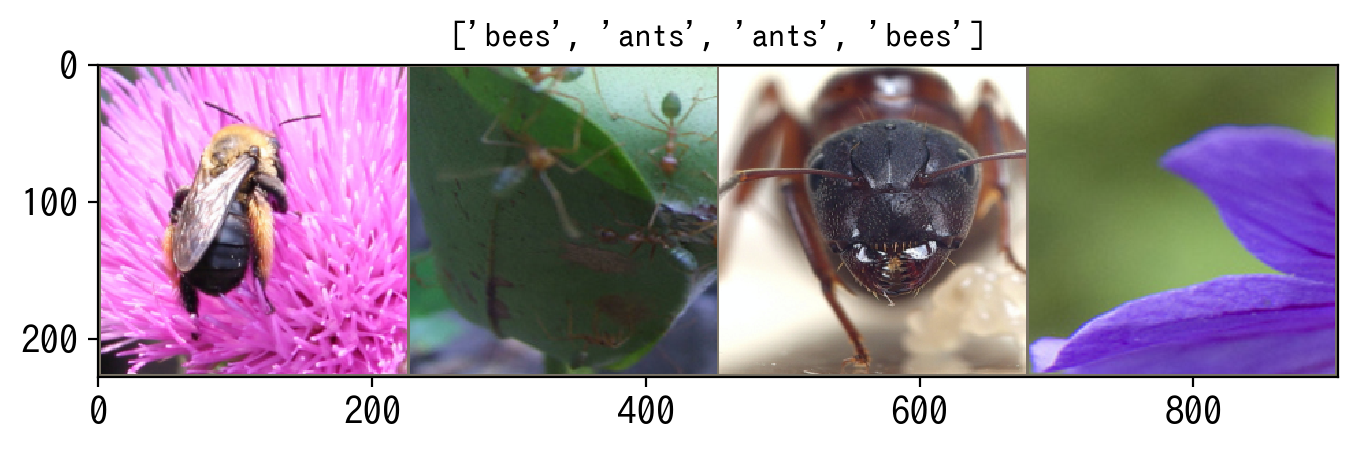

In [13]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

### モデルの学習

モデルの学習に利用される一般的な機能を紹介する

- 学習率のスケジューリング
- ベストなモデルの保存



下記の関数について解説する。

まずは簡単に1エポック分流れだけ概説する。(これをエポック数だけ繰り返している)

- データには*train*用と*validation*用の2種類あり、それぞれで一部異なる処理を実行する
- *train*用データでネットワークを学習
- learning rateをスケジューリングされていた値に更新
- *validation*用データでスコアを確認
- そのスコアがベストスコアであれば、その重み情報をバッファに格納
- 以降、エポック回数だけこれを繰り返していく

---

[**1エポック内部の処理の概要**]

- `dataloaders`からバッチデータ(`inputs`と`labels`)をiterativeに取り出す
- GPU(なければCPUに)にバッチデータを転送する。
    - `inputs = inputs.to(device)`のところ
- `optimizer`の勾配をゼロに初期化する
- *train*データのときのみ、勾配のセットを有効にする
    - `with torch.set_grad_enabled(phase == "train"):`のところ
    - `phase == "train"`のときのみ有効になる
- forward propを行い、lossを計算
- 予測ラベルを取得
    - `_,preds = torch.max(outputs, 1)`のところ
    - `torch.max(outputs, 1)`は、`outputs`の中で一番値が大きいインデックスを取得する、という関数
    - レファレンスは[ここ](https://pytorch.org/docs/master/torch.html?highlight=torch%20max#torch.max)
- *train*データのときのみ、backpropを実行して、重みを更新する
    - `loss.backward()`
    - `oprimizer.step()`
    - *validation*用データのときは値を更新しないので、計算の無駄を省くために*train*のときのみbackprop実行
- 各バッチデータの損失と正解数を保存しておく

---

- 以上が1エポック中の学習処理部分。
- この時点で*validation*用のスコアが最高スコアであるならば、`best_model_wts`を更新する
- 学習率を次の値にセット??
    - `scheduler.step()`

In [39]:
test_hoge = 1

def hogehoge(x):
    print(test_hoge)
    
hogehoge(2)

1


In [38]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()
        
    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

### Visualizing the model predictions

In [15]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(class_names[preds[j]]))
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

### Finetuning the convnet

*Finetuning*を実行する。

以下で実行していることについて解説する。

- `torchvision.models`から転移学習用のネットワークを取得する
    - 下記では`resnet18`を使用している
    - `pretrained`: `torch.utils.model_zoo`を利用して事前訓練したモデルを返す
- `fc`属性(おそらく出力層??)の特徴量の数を取得
- `fc`属性を新しい`Linear`層に変更
- 学習させる新しい`fc`層をGPUに転送(`model_ft.to(device)`)
- 各種の定義
    - 損失関数の定義
    - optimizerの定義
    - lr schedulerの定義

In [52]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

- `torch.nn.Module.eval()`
    - 評価モードに移行する
    - 特定のモジュールでのみ有効
    - `self.train(False)`と同じ効果

### Train and evaluate

In [53]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=25)

Epoch 0/24
----------
train Loss: 0.5156 Acc: 0.7008
val Loss: 0.2607 Acc: 0.9085

Epoch 1/24
----------
train Loss: 0.3737 Acc: 0.8484
val Loss: 0.3301 Acc: 0.8693

Epoch 2/24
----------
train Loss: 0.5102 Acc: 0.7992
val Loss: 0.3623 Acc: 0.8758

Epoch 3/24
----------
train Loss: 0.6659 Acc: 0.7582
val Loss: 0.2309 Acc: 0.9020

Epoch 4/24
----------
train Loss: 0.6238 Acc: 0.7705
val Loss: 0.4437 Acc: 0.8366

Epoch 5/24
----------
train Loss: 0.5584 Acc: 0.7746
val Loss: 0.6112 Acc: 0.7843

Epoch 6/24
----------
train Loss: 0.5773 Acc: 0.7910
val Loss: 0.6170 Acc: 0.8039

Epoch 7/24
----------
train Loss: 0.5826 Acc: 0.7377
val Loss: 0.1970 Acc: 0.9216

Epoch 8/24
----------
train Loss: 0.3468 Acc: 0.8566
val Loss: 0.2029 Acc: 0.9216

Epoch 9/24
----------
train Loss: 0.2883 Acc: 0.8730
val Loss: 0.1986 Acc: 0.9216

Epoch 10/24
----------
train Loss: 0.3077 Acc: 0.8484
val Loss: 0.2103 Acc: 0.9346

Epoch 11/24
----------
train Loss: 0.2595 Acc: 0.8893
val Loss: 0.1922 Acc: 0.9346

Ep

In [49]:
# CPUで回してみる
device = torch.device("cpu")
model_ft_cpu = models.resnet18(pretrained=True)
num_ftrs = model_ft_cpu.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft_cpu.fc = nn.Linear(num_ftrs, 2)

model_ft_cpu = model_ft.to(device)

# Observe that all parameters are being optimized
optimizer_ft_cpu = optim.SGD(model_ft_cpu.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler_cpu = lr_scheduler.StepLR(optimizer_ft_cpu, step_size=7, gamma=0.1)

model_ft_cpu = train_model(model_ft_cpu, criterion, optimizer_ft_cpu, exp_lr_scheduler_cpu,
                           num_epochs=25)

Epoch 0/24
----------
train Loss: 0.4672 Acc: 0.7705
val Loss: 0.1695 Acc: 0.9346

Epoch 1/24
----------
train Loss: 0.5657 Acc: 0.7828
val Loss: 0.3333 Acc: 0.8431

Epoch 2/24
----------
train Loss: 0.5354 Acc: 0.7705
val Loss: 0.1736 Acc: 0.9216

Epoch 3/24
----------
train Loss: 0.3909 Acc: 0.8402
val Loss: 0.1764 Acc: 0.9542

Epoch 4/24
----------
train Loss: 0.6269 Acc: 0.7787
val Loss: 0.4278 Acc: 0.8497

Epoch 5/24
----------
train Loss: 0.4013 Acc: 0.8074
val Loss: 0.3055 Acc: 0.9020

Epoch 6/24
----------
train Loss: 0.3566 Acc: 0.8566
val Loss: 0.3732 Acc: 0.8562

Epoch 7/24
----------
train Loss: 0.4109 Acc: 0.8648
val Loss: 0.2750 Acc: 0.9085

Epoch 8/24
----------
train Loss: 0.3276 Acc: 0.8811
val Loss: 0.2442 Acc: 0.9216

Epoch 9/24
----------
train Loss: 0.4013 Acc: 0.8730
val Loss: 0.2320 Acc: 0.9216

Epoch 10/24
----------
train Loss: 0.2757 Acc: 0.8811
val Loss: 0.2192 Acc: 0.9150

Epoch 11/24
----------
train Loss: 0.3320 Acc: 0.8770
val Loss: 0.3416 Acc: 0.8693

Ep

### GPUとCPUの比較

- ノートPCということもあるが、CPUだと学習に1 h強を要した
- GPUを使うと、10 min弱ということで、6~7倍の高速化
- ベストスコアは同じになっている
    - ただ、各エポックごとのスコアを確認すると異なっている
    - ベストスコアが同じになったのはたまたま?
    - **(追記):** GPUの計算をもう一回やったらスコアが異なるものになったので、たまたま??
    - // ていうか学習結果に再現性が無いのってどうなの...?

In [50]:
# 元に戻す
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

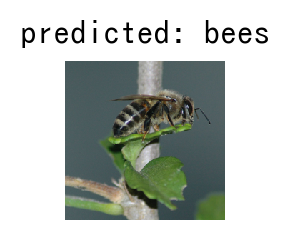

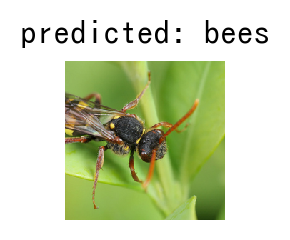

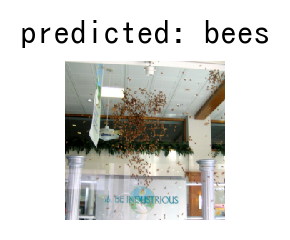

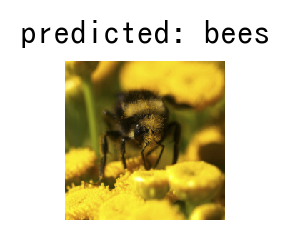

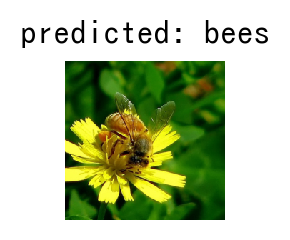

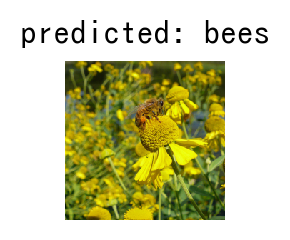

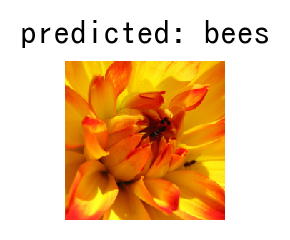

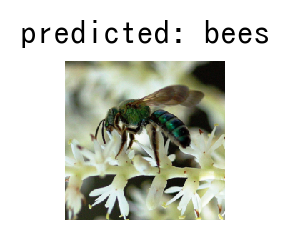

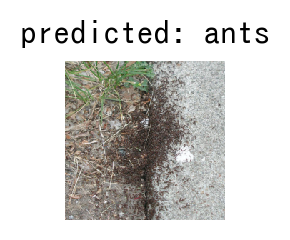

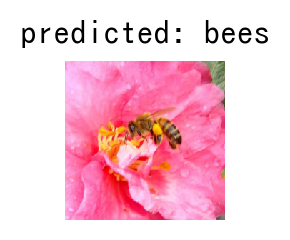

In [55]:
visualize_model(model_ft, 10)

### ConvNet as fixed feature extractor

最終層以外のすべての重みの更新を停止させる。

そのためには、`required_grad == False`に設定する。
これにより、`backward()`を実行した際に勾配は計算されなく成る。

In [56]:
model_conv = torchvision.models.resnet18(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

In [57]:
model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------
train Loss: 0.6343 Acc: 0.6393
val Loss: 0.4218 Acc: 0.8170

Epoch 1/24
----------
train Loss: 0.6740 Acc: 0.7213
val Loss: 0.1903 Acc: 0.9608

Epoch 2/24
----------
train Loss: 0.5369 Acc: 0.7705
val Loss: 0.3991 Acc: 0.8301

Epoch 3/24
----------
train Loss: 0.4885 Acc: 0.8033
val Loss: 0.1967 Acc: 0.9477

Epoch 4/24
----------
train Loss: 0.4057 Acc: 0.8115
val Loss: 0.1909 Acc: 0.9542

Epoch 5/24
----------
train Loss: 0.4498 Acc: 0.8238
val Loss: 0.2042 Acc: 0.9477

Epoch 6/24
----------
train Loss: 0.6261 Acc: 0.7664
val Loss: 0.3766 Acc: 0.8693

Epoch 7/24
----------
train Loss: 0.4538 Acc: 0.8402
val Loss: 0.1895 Acc: 0.9412

Epoch 8/24
----------
train Loss: 0.3673 Acc: 0.8525
val Loss: 0.1868 Acc: 0.9542

Epoch 9/24
----------
train Loss: 0.3286 Acc: 0.8607
val Loss: 0.1795 Acc: 0.9542

Epoch 10/24
----------
train Loss: 0.4451 Acc: 0.8033
val Loss: 0.1832 Acc: 0.9542

Epoch 11/24
----------
train Loss: 0.3451 Acc: 0.8402
val Loss: 0.1963 Acc: 0.9542

Ep